In [4]:
# Load dependencies
from src import RelErrorTracker
import scipy.sparse.linalg as spla
import scipy.sparse as sp
import numpy as np
import scipy.io
import time
from matplotlib import pyplot as plt
import ilupp

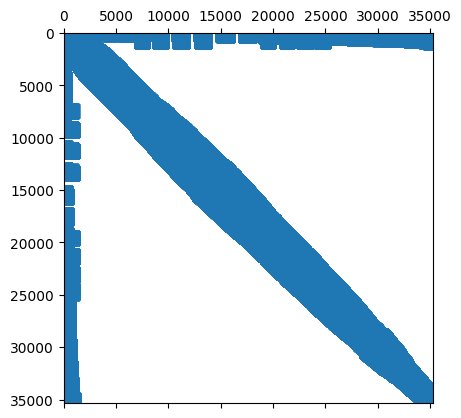

In [5]:
mat = scipy.io.loadmat('../data/cooling_flange.mat')
A = mat["A"]
b = np.random.rand(A.shape[0])
plt.spy(A)

### Linear (sparse) Solver:

In [6]:
t = time.time()
x_ls = spla.spsolve(A,b)
dt = time.time() - t
print(f"Computation time linear solver: {dt} seconds. Relative error: {np.linalg.norm(A*x_ls-b)/np.linalg.norm(b)}")

Computation time linear solver: 10.5150887966156 seconds. Relative error: 3.687193606152044e-12


### Regular Conjugate Gradient:

In [7]:
relerror = 1e-4

relerr_cg = RelErrorTracker(A,b)
t = time.time()
x_cg = spla.cg(A, b, tol = relerror, callback = relerr_cg.callback1)[0]
dt = time.time() - t
print(f"Computation time conjugate gradient: {dt} seconds. Relative error: {np.linalg.norm(A*x_cg-b)/np.linalg.norm(b)}")

Computation time conjugate gradient: 4.157563209533691 seconds. Relative error: 9.701609110540667e-05


### PCG (M: diag)

In [8]:
relerr_pcgd = RelErrorTracker(A,b)

M = sp.diags(A.diagonal()**(-1))
t = time.time()
x_pcgd = spla.cg(A, b, tol = relerror, M = M, callback=relerr_pcgd.callback1)[0]
dt = time.time() - t
print(f"Computation time preconditioned conjugate gradient: {dt} seconds. Relative error: {np.linalg.norm(A*x_pcgd-b)/np.linalg.norm(b)}")

Computation time preconditioned conjugate gradient: 3.691295862197876 seconds. Relative error: 9.961051983273211e-05


### PCG (M: ichol)

In [9]:
relerr_pcgc = RelErrorTracker(A,b)

M = ilupp.IChol0Preconditioner(sp.csr_matrix(A))
t = time.time()
x_pcgc = spla.cg(A, b, tol = relerror, M = M, callback=relerr_pcgc.callback1)[0]
dt = time.time() - t
print(f"Computation time preconditioned conjugate gradient: {dt} seconds. Relative error: {np.linalg.norm(A*x_pcgc-b)/np.linalg.norm(b)}")

Computation time preconditioned conjugate gradient: 1.0385222434997559 seconds. Relative error: 9.797310951729807e-05


### Compare plots

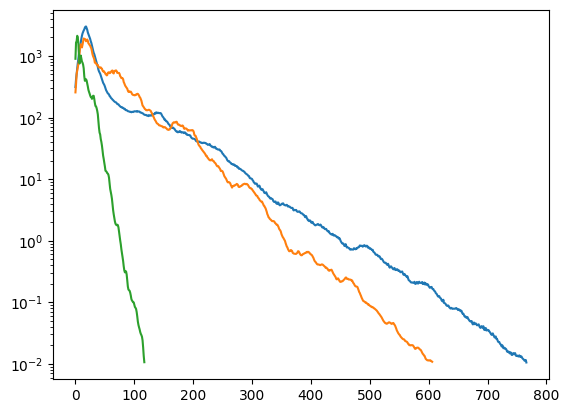

In [10]:
plt.semilogy(relerr_cg.norms)
plt.semilogy(relerr_pcgd.norms)
plt.semilogy(relerr_pcgc.norms)
plt.show()

### Part c

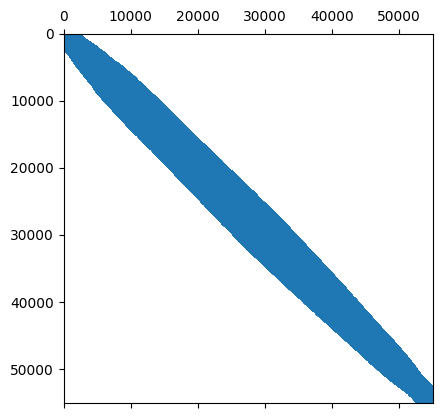

In [11]:
mat = scipy.io.loadmat('../data/convdiff.mat')
A = mat["A"]
b = np.random.rand(A.shape[0])
plt.spy(A)

Construct preconditioner ilu:

In [12]:
M = ilupp.ILUTPreconditioner(sp.csr_matrix(A))

Computation time preconditioned gmres: 4.979144811630249 seconds. Relative error: 8.823158018508117e-05


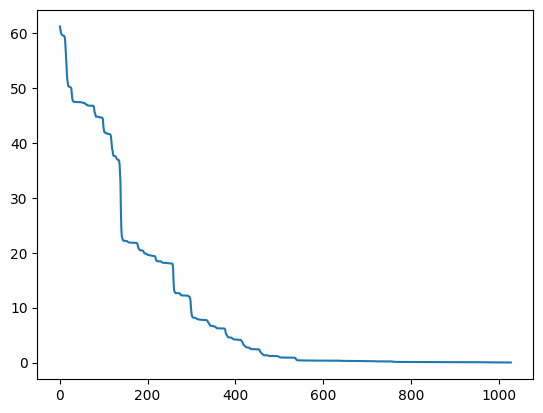

In [15]:
relerr_gm = RelErrorTracker(A,b)

t = time.time()
x_gm = spla.gmres(A, b, tol = relerror, M=M, callback=relerr_gm.callback2, callback_type = "pr_norm")[0]
dt = time.time() - t
print(f"Computation time preconditioned gmres: {dt} seconds. Relative error: {np.linalg.norm(A*x_gm-b)/np.linalg.norm(b)}")
#Save to matlab file:
scipy.io.savemat('../data/x_gm.mat', {'x_gm':x_gm})
scipy.io.savemat('../data/b.mat', {'b':b})

plt.plot(relerr_gm.norms)

### Using the package "ilupp"

In [14]:
A = sp.csr_matrix(A)
t = time.time()
x_ilupp, info = ilupp.solve(A,b, info = True, rtol = relerror)
dt = time.time() - t
print(f"Computation time using ilupp: {dt} seconds. Relative error: {np.linalg.norm(A*x_ilupp-b)/np.linalg.norm(b)}")
print(f"ILUPP converged at {info[0]} iterations")

Computation time using ilupp: 0.9256677627563477 seconds. Relative error: 5.552491136637094e-07
ILUPP converged at 122 iterations


(2480,)